In [97]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import seaborn as sns


In [84]:
df = pd.read_csv('../data/solarpowergeneration.csv')

In [85]:

target = 'power-generated'
features = [col for col in df.columns if col != target]


In [86]:
X = df[features]
y = df[target]

In [87]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [88]:

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    loss_function='RMSE',
    eval_metric='R2',
    early_stopping_rounds=50,
    random_seed=42,
    verbose=100
)
model.fit(X_train, y_train)

0:	learn: 0.0460394	total: 3.86ms	remaining: 3.85s
100:	learn: 0.9126442	total: 223ms	remaining: 1.99s
200:	learn: 0.9436639	total: 382ms	remaining: 1.52s
300:	learn: 0.9572870	total: 494ms	remaining: 1.15s
400:	learn: 0.9650908	total: 604ms	remaining: 902ms
500:	learn: 0.9705871	total: 703ms	remaining: 700ms
600:	learn: 0.9754988	total: 794ms	remaining: 527ms
700:	learn: 0.9797153	total: 886ms	remaining: 378ms
800:	learn: 0.9830148	total: 979ms	remaining: 243ms
900:	learn: 0.9858127	total: 1.07s	remaining: 118ms
999:	learn: 0.9877206	total: 1.16s	remaining: 0us


In [89]:

y_pred = model.predict(X_test)

In [90]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("mae = " , mae)
print("rmse = ", rmse)

mae =  1397.9455098783978
rmse =  3224.807581942632


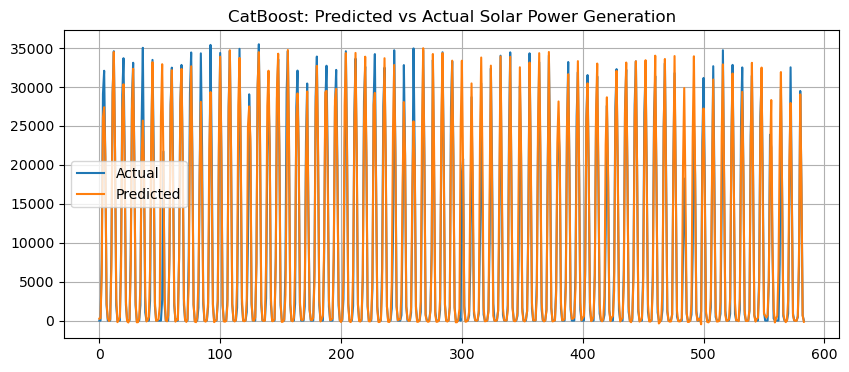

In [91]:
plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("CatBoost: Predicted vs Actual Solar Power Generation")
plt.grid(True)
plt.show()

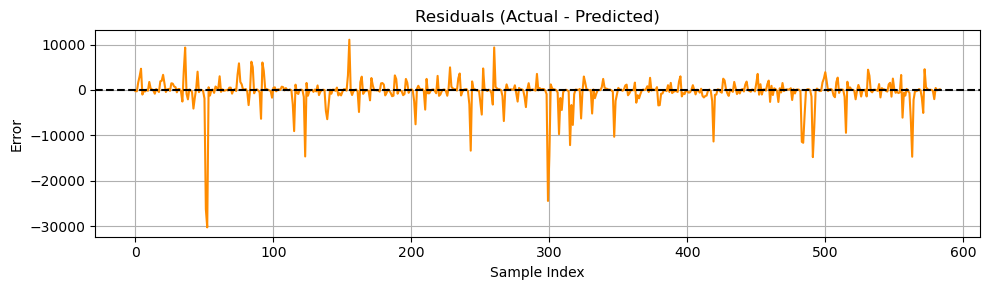

In [92]:
residuals = y_test.values - y_pred

plt.figure(figsize=(10, 3))
plt.plot(residuals, color='darkorange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


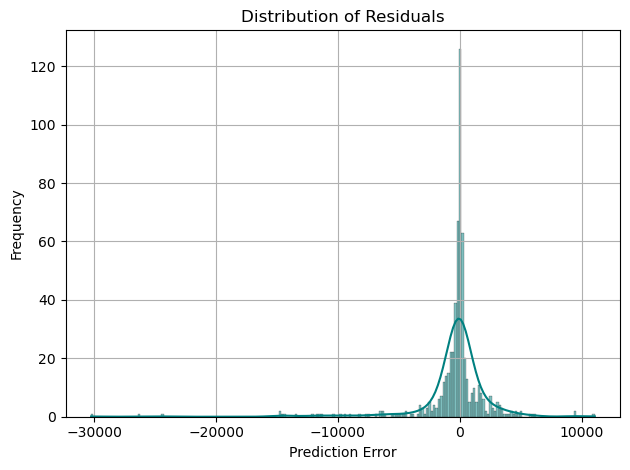

In [93]:


sns.histplot(residuals, kde=True, color='teal')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

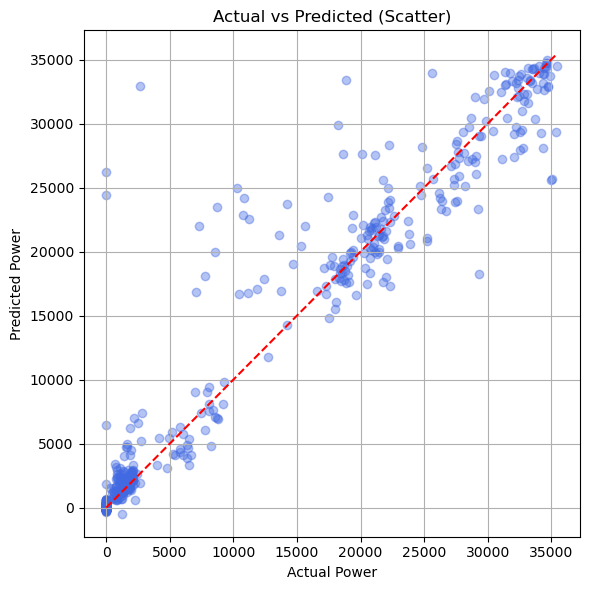

In [94]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted (Scatter)")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.tight_layout()
plt.show()

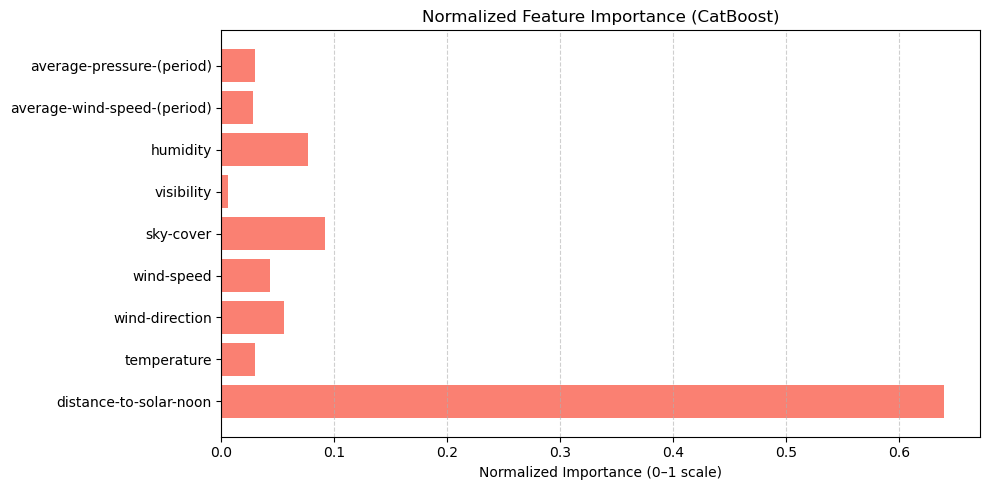

In [95]:

# Get raw feature importances from CatBoost
raw_importances = model.get_feature_importance()
normalized_importances = raw_importances / np.sum(raw_importances)

# Get feature names
feature_names = X.columns

# Plot normalized feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names, normalized_importances, color='salmon')
plt.xlabel("Normalized Importance (0–1 scale)")
plt.title("Normalized Feature Importance (CatBoost)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [96]:

r2 = r2_score(y_test, y_pred)

print("🔍 Model Performance Summary (CatBoost)")
print(f"📈 MAE  (Mean Absolute Error): {mae:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"🎯 R² Score: {r2:.4f}")
print(f"✅ Accuracy-like Score: {r2 * 100:.2f}%")

🔍 Model Performance Summary (CatBoost)
📈 MAE  (Mean Absolute Error): 1397.95
📉 RMSE (Root Mean Squared Error): 3224.81
🎯 R² Score: 0.9298
✅ Accuracy-like Score: 92.98%
